----------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Датафрейм users содержит 4 столбца. Типы данных соотвествуют.

In [5]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides['duration'].value_counts(ascending = True)

22.184080     1
17.987153     1
12.909262     1
21.515441     1
15.935658     1
             ..
22.322865     1
22.770261     1
11.949357     1
22.797391     1
0.500000     95
Name: duration, Length: 17974, dtype: int64

Из 16925 поездок 95 были продолжительностью 30сек, 0.56% - можно оставить без изменений <a id='start'></a> 

In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Датафрейм rides содержит 4 столбца. Столец data имеет тип данных object - необходимо перевести его в datetime64, чтобы было удобно работать с библиотекой пандас.

In [8]:
len(rides['user_id'].unique()) # всего уникальных пользователя 1534

1534

In [9]:
subscriptions.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Датафрейм subscriptions имеет 3 столбца, типы данных столбцов соответсвуют

In [11]:
subscriptions.value_counts()

subscription_type  minute_price  start_ride_price  subscription_fee
free               8             50                0                   1
ultra              6             0                 199                 1
dtype: int64

#### Шаг 2. Предобработка данных

In [12]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d') 

In [13]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [14]:
rides['month'] = pd.DatetimeIndex(rides['date']).month

In [15]:
period = pd.to_datetime(rides['date'], format='%Y-%m-%d').max() - pd.to_datetime(rides['date'], format='%Y-%m-%d').min()
period # данные даны за 363 дня

Timedelta('363 days 00:00:00')

In [16]:
rides['date'].sort_values(ascending = False).head()


2576    2021-12-30
3278    2021-12-30
11752   2021-12-30
15704   2021-12-30
14115   2021-12-30
Name: date, dtype: datetime64[ns]

In [17]:
rides['date'].sort_values(ascending = False).tail()

2754    2021-01-01
13591   2021-01-01
2888    2021-01-01
13356   2021-01-01
0       2021-01-01
Name: date, dtype: datetime64[ns]

Данные за 2021 год (с 1 января по 30 декабря)

In [19]:
rides

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


In [20]:
users.duplicated().sum() # присутсвует 31 строка,являющаяся явным дубликатом, не повлияет на анализ,однако для получения более надежных результатов я их удалю

31

In [21]:
users = users.drop_duplicates()  

In [22]:
users.duplicated().sum()

0

In [23]:
rides.duplicated().sum() #в датафрейме нет явных дубликатов

0

In [24]:
subscriptions.duplicated().sum() #в датафрейме нет явных дубликатов

0

In [25]:
users.isna().sum() #в датафрейме нет пропущенных значений

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [26]:
rides.isna().sum() #в датафрейме нет пропущенных значений

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [27]:
subscriptions.isna().sum() #в датафрейме нет пропущенных значений

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

После проверки датафреймов на пропущенные значения,дубликаты и несоответсвие названия столбцов змеиному регистру, предобработка данных окончена

#### Шаг 3. Исследовательский анализ данных

In [28]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [29]:
#users['city'].hist(bins = 20, figsize = (11,6))
#plt.show()

In [30]:
users_cities = users['city'].value_counts(ascending = False) #отображение частоты встречаемости городов с сортировкой по убыванию

In [31]:
users_cities

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

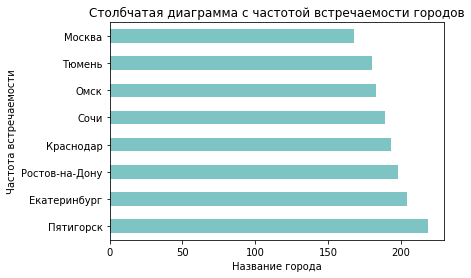

In [32]:
users_cities.plot.barh(alpha = 0.5, color = 'darkcyan')
plt.xlabel('Название города')
plt.ylabel('Частота встречаемости')
plt.title('Cтолбчатая диаграмма с частотой встречаемости городов')
plt.show()

В датафрейме users разные города встречаются с частотой от ~168 до 219 раз. Чаще всего встречается Пятигорск, реже - Москва

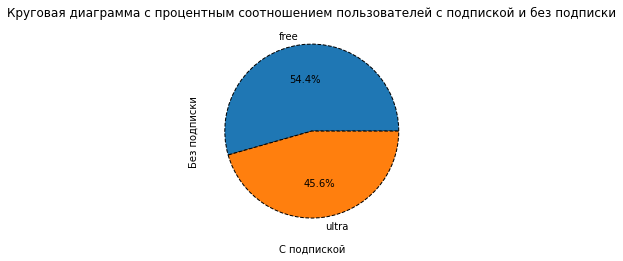

In [33]:
users_subscription_type = users['subscription_type'].value_counts()
users_subscription_type.plot(kind ='pie', y = 'subscription_type',autopct='%1.1f%%',wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
plt.xlabel('С подпиской')
plt.ylabel('Без подписки')
plt.title('Круговая диаграмма с процентным соотношением пользователей с подпиской и без подписки')
plt.show()

Количество пользователей без подписки 54.4%, с подпиской - 45.6%

In [34]:
free = users[users['subscription_type'] == 'free'].count() # количество пользователей без подписки
free

user_id              835
name                 835
age                  835
city                 835
subscription_type    835
dtype: int64

In [35]:
ultra = users[users['subscription_type'] == 'ultra'].count() # количество пользователей с подпиской
ultra

user_id              699
name                 699
age                  699
city                 699
subscription_type    699
dtype: int64

    Количество подписчиков с free-подпиской: 835    
    Количество любителей старой-доброй untra-подписки: 699

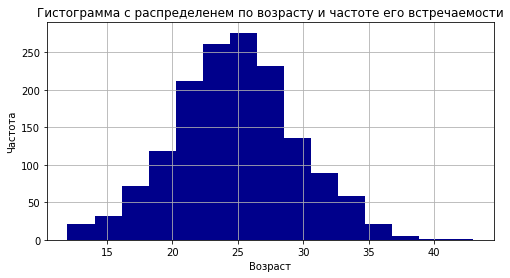

In [36]:
users['age'].hist(bins = 15,figsize = (8,4), color = 'darkblue')
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.title('Гистограмма с распределенем по возрасту и частоте его встречаемости')
plt.show()

In [37]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

    Минимальный возраст пользователей - 12 лет
    Медианный возраст пользователей - 25 лет (средний ~25)
    Максимальный возраст пользователей - 43 года
    На гистограмме представлено нормальное распределение

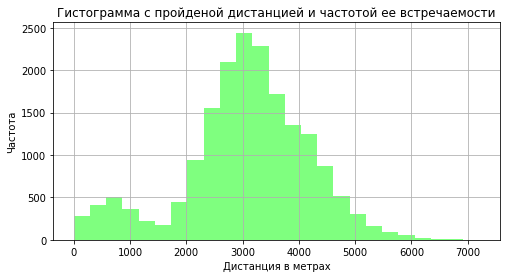

In [38]:
rides['distance'].hist(bins = 25,figsize = (8,4),color = 'lime', alpha = 0.5)
plt.xlabel("Дистанция в метрах")
plt.ylabel("Частота")
plt.title('Гистограмма с пройденой дистанцией и частотой ее встречаемости')
plt.show()

In [39]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

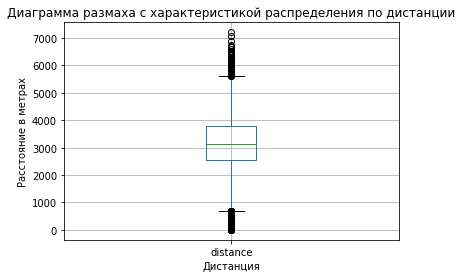

In [40]:
rides.boxplot('distance')
plt.xlabel('Дистанция')
plt.ylabel('Расстояние в метрах')
plt.title('Диаграмма размаха с характеристикой распределения по дистанции')
plt.show()

    Минимальная дистанция за одну поездку составляет 855 м
    Медианная дистанция за одну поездку составляет 3133 м, средняя 3070м
    Максимальная дистанция за одну поездку составляет 7211 м
    На диаграмме размаха присутсвиуют выбросы

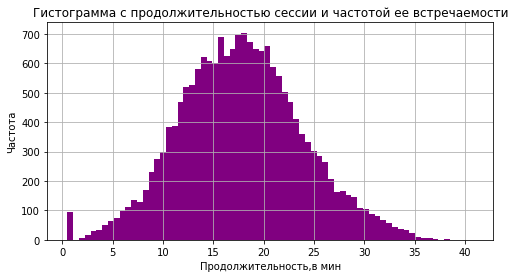

In [41]:
rides['duration'].hist(bins = 70,figsize = (8,4),color = 'purple')
plt.xlabel('Продолжительность,в мин')
plt.ylabel('Частота')
plt.title('Гистограмма с продолжительностью сессии и частотой ее встречаемости')
plt.show()

Увеличив количество корзин с 15 до 70 я выявил пик около 0, в [начале проекта](start), я выяснил что это 95 поездок с продолжительностью 0.5 мин. Возможно, данный самокат был в плохом состоянии и пользователи заменили его через короткое время,возможно ошибки в самих исходных данных, однако их количество не превышает 0.56% от общего объема данных и поэтому ими можно пренебречь,образно выражаясь

In [42]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

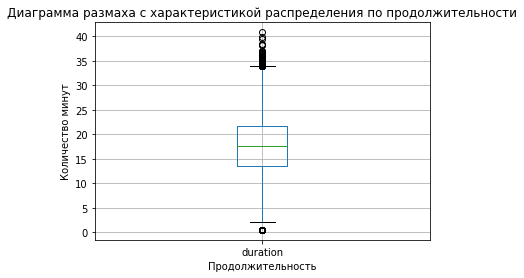

In [43]:
rides.boxplot('duration')
plt.xlabel('Продолжительность')
plt.ylabel('Количество минут')
plt.title('Диаграмма размаха с характеристикой распределения по продолжительности')
plt.show()

    Минимальная продолжительность поездки 0.5 мин
    Медианная продолжительность поездки 17.6 мин,средняя - 17.8
    Максимальная продолжительность поездки 40.8 мин
    На диаграмме размаха присутсвиуют выбросы
    

#### Шаг 4. Объединение данных

In [44]:
data = users.merge(rides, on = 'user_id', how='left', ).merge(subscriptions,on = 'subscription_type', how='left', )

In [45]:
users_free =  data[data['subscription_type'] == 'free'] #users.query('subscription_type == free')
users_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


Получен объединенный датасет из 11568 строк и 12 столбцов

In [46]:
users_ultra = data[data['subscription_type'] == 'ultra'] #users.query('subscription_type == ultra')
users_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


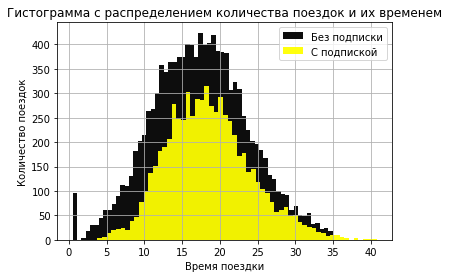

In [47]:
no_sub = users_free['duration']
yes_sub =  users_ultra['duration']
users_free['duration'].hist(bins = 60,alpha = 0.95,color = 'k')
users_ultra['duration'].hist(bins = 60,alpha = 0.95, color = 'yellow')
plt.xlabel('Время поездки')
plt.ylabel('Количество поездок')
plt.title('Гистограмма с распределением количества поездок и их временем')
plt.legend(['Без подписки', 'С подпиской'])
plt.show()

In [48]:
users_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [49]:
users_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

**На Гистограмме визуализируется**:
    
    Нормальное распределение
    
    Для обеих категорий пользователей среднее время пользования самокатом составило 17-18 мин
    
    Минимальное время пользования пользователей с подпиской составило 3.76 минуты
    
    У пользователей без подписки визуализируется пик поездок с продолжительностью 0.5мин 
    
    Максимальное время пользования для пользователей с подпиской 40.8 мин, для пользователей без - 34.9

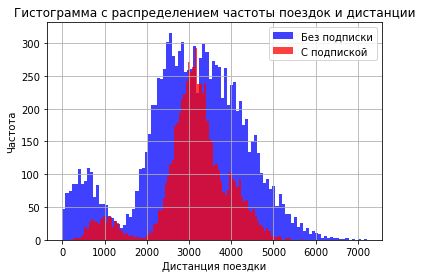

In [50]:
no_sub = users_free['distance']
yes_sub =  users_ultra['distance']
users_free['distance'].hist(bins = 100,alpha = 0.75,color = 'b')
users_ultra['distance'].hist(bins = 100,alpha = 0.75, color = 'r')
plt.xlabel('Дистанция поездки')
plt.ylabel('Частота')
plt.title('Гистограмма с распределением частоты поездок и дистанции')
plt.legend(['Без подписки', 'С подпиской'])
plt.show()

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отличные и наглядные визуализации!  </div>

In [51]:
users_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [52]:
users_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

**На Гистограмме визуализируется**:
    
    Двух пиковое распределение
    
    Наиболее часто пользователи без подписки пользовались сервисом,чтобы проехать расстояние в 2000-4000м
    
    Наиболее часто пользователи с подпиской пользовались сервисом,чтобы проехать расстояние в 2500-3500м
    
    Минимальное расстояние для пользователей с подпиской составило 244м, без подписки - менее 1м
    
    Большое количество пользователей обеих групп часто использует сервис для поездки на расстояние до  1300м
    
    Максимальное преодоленное расстояние для пользователей с подпиской - 5700м, без подписки - 7211м

#### Шаг 5. Подсчёт выручки

In [53]:
data['duration'] = np.ceil(data['duration']) 

In [54]:
data_agg = data.groupby(['user_id','month']).agg(
    {
    'distance':'sum','duration':['sum', 'count'],
    'subscription_type':'first', 'minute_price':'first',
    'start_ride_price':'first', 'subscription_fee':'first'
    }
)
data_agg.columns = data_agg.columns.map('_'.join).to_series()
data_agg = data_agg.reset_index()

In [55]:
data_agg = data_agg.rename(columns ={'duration_count':'trips_number_per_month',
                                     'minute_price_first':'minute_price',
                                     'start_ride_price_first':'start_ride_price',
                                     'subscription_fee_first':'subscription_fee',
                                     'subscription_type_first': 'subscription_type'}
                          )
data_agg
#суммарная дистанция, время и количетсво поездок по каждому номеру месяца

,user_id,month,distance_sum,duration_sum,trips_number_per_month,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,42.0,2,ultra,6,0,199
1,1,4,754.159807,7.0,1,ultra,6,0,199
2,1,8,6723.470560,46.0,2,ultra,6,0,199
3,1,10,5809.911100,32.0,2,ultra,6,0,199
4,1,11,7003.499363,56.0,3,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,2,free,8,50,0
11327,1534,8,7622.453034,48.0,2,free,8,50,0
11328,1534,9,4928.173852,23.0,1,free,8,50,0
11329,1534,11,13350.015305,78.0,4,free,8,50,0


In [56]:
data_agg['month_income'] = data_agg['start_ride_price'] * data_agg['trips_number_per_month'] + data_agg['minute_price'] * data_agg['duration_sum'] + data_agg['subscription_fee']

Датафрейм с агрегированными данными,в столбце 'month_income' информация о помесячной выручке

In [57]:
data_agg

,user_id,month,distance_sum,duration_sum,trips_number_per_month,subscription_type,minute_price,start_ride_price,subscription_fee,month_income
0,1,1,7027.511294,42.0,2,ultra,6,0,199,451.0
1,1,4,754.159807,7.0,1,ultra,6,0,199,241.0
2,1,8,6723.470560,46.0,2,ultra,6,0,199,475.0
3,1,10,5809.911100,32.0,2,ultra,6,0,199,391.0
4,1,11,7003.499363,56.0,3,ultra,6,0,199,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,2,free,8,50,0,308.0
11327,1534,8,7622.453034,48.0,2,free,8,50,0,484.0
11328,1534,9,4928.173852,23.0,1,free,8,50,0,234.0
11329,1534,11,13350.015305,78.0,4,free,8,50,0,824.0


#### Шаг 6. Проверка гипотез

6.1. Гипотеза: тратят ли пользователи с подпиской больше времени на поездки
    
    H0:μ1 = μ2 Время пользования самокатом у пользователей с подпиской равна времени пользования сервисиом от пользователей без подписки

    H1:μ1 > μ2 Пользователи с подпиской тратят больше времени на поездки чем пользователи без подписки 

In [58]:
data.groupby('subscription_type')['duration'].sum() #время,которое 699 пользователя с подпиской и 835 без подписки проехали за весь временной период

subscription_type
free     206963.0
ultra    123745.0
Name: duration, dtype: float64

In [59]:
mean_time_free = data.groupby('subscription_type')['duration'].sum()[0] / 835
mean_time_free

247.85988023952095

In [60]:
mean_time_ultra = data.groupby('subscription_type')['duration'].sum()[1] / 699
mean_time_ultra

177.03147353361945

In [61]:
time_free = data.loc[data['subscription_type'] == 'free','duration']
time_ultra = data.loc[data['subscription_type'] == 'ultra','duration']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(
    time_ultra, 
    time_free,
    alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, время значительно отличается')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу, время значительно отличается


Гипотеза о том, что пользователи с подпиской могут быть «выгоднее» для компании,так как дольше используют сервис- неверна,потому что среднее количество минут пользования самокатом у пользователей c подпиской составляет 177 мин,
а у пользователя без подписки- 247 мин

6.2. Гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров
    
    H0:μ1 = μ2 Расстояние, которое проезжают пользователи с подпиской равно 3130м

    H1:μ1 > μ2 Расстояние, которое проезжают пользователи с подпиской больше 3130м

In [62]:
interested_value = 3130 #расстояние, которое проезжают пользователи с подпиской за одну поездку
alpha = 0.05 # уровень статистической значимости
distance_ultra = users_ultra['distance']

results = st.ttest_1samp(
    distance_ultra, 
    interested_value,alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,среднее расстояние значительно отличается от 3130м')
else:
    print('Не получилось отвергнуть нулевую гипотезу,отличается незначительно')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу,отличается незначительно


In [63]:
users_ultra['distance'].mean() #средняя дистанция у пользователей с подпиской

3115.4453880370247

Не получилось отвергнуть гипотезу, среднее расстояние пользователей с подпиской не превышает 3130 метров,а конкретно равняется 3115м 

6.3. Гипотеза: будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
    
    H0:μ1 = μ2 Выручка от пользователей с подпиской равна выручке от пользователей без подписки

    H1:μ1 > μ2 Выручка от пользователей с подпиской больше выручки от пользователей без подписки

In [64]:
free_price = data_agg.loc[data_agg['subscription_type'] == 'free','month_income']
ultra_price = data_agg.loc[data_agg['subscription_type'] == 'ultra','month_income']

alpha = 0.05

results = st.ttest_ind(ultra_price,free_price,alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,выручка от пользователей с подпиской значительно больше,чем от пользователей без нее')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу,выручка от пользователей с подпиской значительно больше,чем от пользователей без нее


In [65]:
data_agg.groupby('subscription_type')['month_income'].mean() #средняя выручка пользователей без подписки и с подпиской

subscription_type
free     328.641365
ultra    362.792191
Name: month_income, dtype: float64

Средняя сумма выручки за месяц за пользователя с подпиской 362р,без подписки - 328р.

6.4. В данной задаче используется: 
    Гипотеза о равенстве средних для зависимых (парных) выборок
    
    Гипотезы в таком случае будут сформулированы так:
            
        H0:μ1=μ2
            
        H1:μ1>μ2 - было больше обращений,стало меньше
            
        где μ1 и μ2 — средние количество обращений в поддержку
        
    Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python,
    
    применяется метод scipy.stats.ttest_rel()
    
    alternative='greater', проверяется левосторонняя альтернативная гипотеза о том, что истинное среднее меньше

#### Шаг 7. Распределения

<div style="border:solid Chocolate 2px; padding: 40px">  
    Заключительный вывод:
        
    Было прочитано 3 датафрейма, выполнена предобработка данных с проверкой на явные и неявные дубликаты, пропущенные значения.
    
    Количество некорректных данных в таблице небольшое (31строка с явными дубликатами и 95 строк с очень низкой продолжительностью заездов пользователей без подписки). Низкая продолжительность может быть связана с ошибками загруженных данных,либо с тем что есть проблема с конкретным самокатом и пользователь очень быстро закончил сессию

    Проведен исследовательский анализ данных с построением необходимых графиков и заключением
    
    Проведено объединение полученных датафреймов с построением гистограмм с распределением количества поездок и их временем;частотой поездок и дистанцией с оценкой и описанием данных
    
    Процент пользователей без подписки 54.4%, с подпиской - 45.6%.
    
    Количество минут пользования самокатом у пользователей c подпиской составляет 177 мин, а у пользователя без подписки- 247 мин. Тот факт, что пользователи без подписки больше времени проводят в поездке,а сервис получает с них меньше выручки, свидетельствует о том, что,возможно,стоит рассмореть вариант изменения условий оферты в пользу подорожания пользования самокатом для клиентов без платной подписки.
    
    В среднем пользователи с подпиской проезжают 3115м, что очень близко к 3130м, что оптимально с точки зрения износа самоката
  
    За пользователя с подпиской компания получает в среднем в месяц больше денег (на 34рубля больше),чем за пользователя без подписки. Возможно,стоит провести маркетинговую акцию,целью которой будет повысить процент пользователей,приобретающих платную подписку
